In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Ideal Case for  $\beta$ = 0.35, 0.50, 0.75

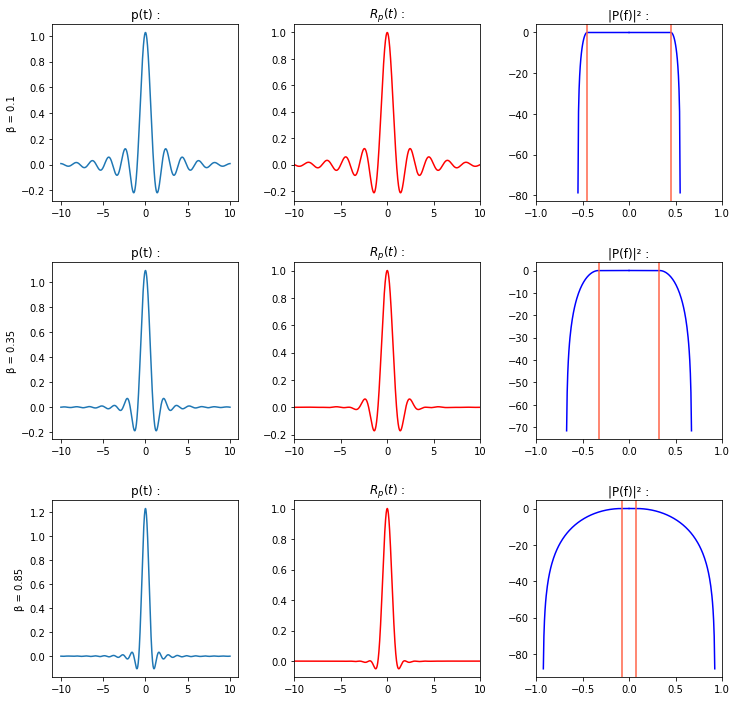

In [2]:
N_samples_sec = 400 #Sample Frequency
t_sample = 1/N_samples_sec # 
t_i = np.arange(-10, 10, t_sample) # Time array
t_rev = t_i[::-1]
L_t = len(t_i) # Length of time array

Ts = 1
beta = [0.1, 0.35, 0.85]

rrc_p = []
Rp_p_theoretical = []
rrc_p_reversed = []

fT = N_samples_sec * np.arange(L_t) / 2**16

P_f_mag = np.zeros((len(beta), len(fT)))
for i, b in enumerate(beta):
    # RRC Pulse
    rrc_p.append((4*b/(np.pi*np.sqrt(Ts)*(1 - (4*b*t_i/Ts)**2))) * (np.cos((1+b)*np.pi*t_i/Ts) + np.sin((1-b)*np.pi*(t_i/Ts))*(1/(4*b*(t_i/Ts)))))
    # Rp Pulse
    
    Rp_p_theoretical.append(np.sinc(t_i/Ts)*(np.cos(b*np.pi*t_i/Ts)/(1-4*(b*t_i/Ts)**2)))
    Rp_p_theoretical[i] = np.trim_zeros(Rp_p_theoretical[i])
    # Reversed RRC Pulse
    rrc_p_reversed.append((4*b/(np.pi*np.sqrt(Ts)*(1 - (4*b*t_rev/Ts)**2))) * (np.cos((1+b)*np.pi*t_rev/Ts) + np.sin((1-b)*np.pi*(t_rev/Ts))*(1/(4*b*(t_rev/Ts)))))
    
    # |P(f)|^2
    for j, f in enumerate(fT):
        if np.abs(f) < ((1-b)/2*Ts):
            P_f_mag[i][j] = Ts
        elif np.abs(f) <= ((1+b)/2*Ts):
            P_f_mag[i][j] = (Ts/2)*(1 - np.sin((np.pi*Ts/b)*(f - (1/(2*Ts)))))
        
    

    
    
# Plot 
fig, axs = plt.subplots(len(beta),3, figsize=(12,12))
fig.subplots_adjust(wspace=0.3, hspace=0.35)
for i,b in enumerate(beta):
    axs[i][0].plot(t_i, rrc_p[i])
    axs[i][0].set_title("p(t) :")
    axs[i][0].set_ylabel("\u03B2 = %s" %str(b))
    
    axs[i][1].plot(t_i, Rp_p_theoretical[i], c='r')
    axs[i][1].set_xlim(-10,10)
    axs[i][1].set_title("$R_p(t)$ :")
    
    axs[i][2].plot(fT, 20*np.log10(P_f_mag[i]/max(P_f_mag[i])), c='b')
    axs[i][2].plot(-fT,20*np.log10(P_f_mag[i]/max(P_f_mag[i])), c='b')
    axs[i][2].axvline(x=(1-b)/(2*Ts),  c='tomato')
    axs[i][2].axvline(x=-(1-b)/(2*Ts), c='tomato')
    #axs[i][2].plot(fT, P_f_mag[i], c='tomato')
    #axs[i][2].plot(-fT,P_f_mag[i], c='tomato')
    axs[i][2].set_xlim(-1,1)
    axs[i][2].set_title("|P(f)|\u00B2 :")

### Truncated Case for $\beta$ = 0.35  &  N = 2, 4, 8 samples

Rp(t=1) for Window Length: 2  -  0.008543444360859156
Rp(t=1) for Window Length: 4  -  -0.002094408309989091
Rp(t=1) for Window Length: 8  -  -0.002197221186751914


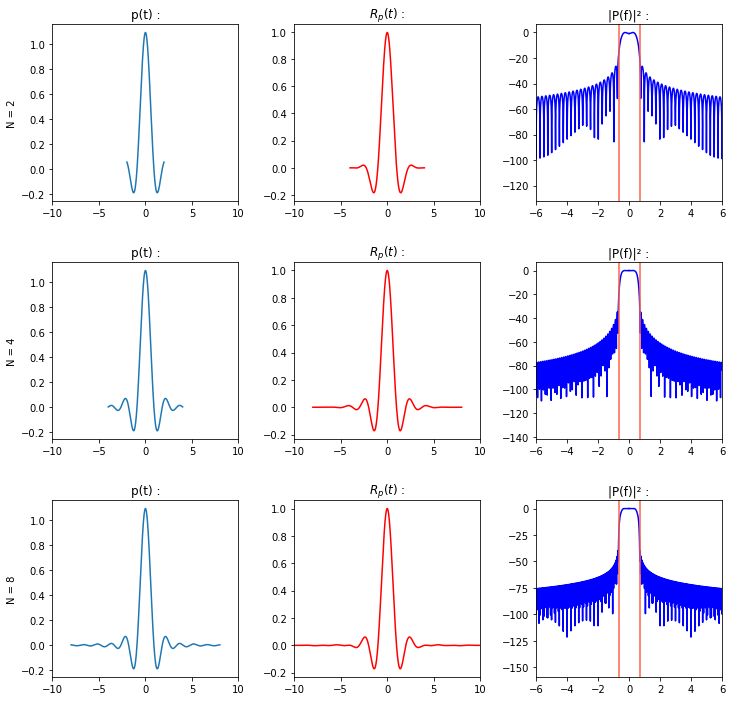

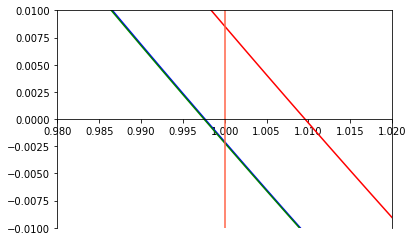

In [8]:
#x_I = np.array([-1,3,3,1,-1])

N_samples_sec = 400 #Sample Frequency
t_sample = 1/N_samples_sec # 
 # Time array



Ts = 1
beta = 0.35
trunc = [2, 4, 8]

#shaped_pulse = np.repeat(x_I,N_samples_sec*Ts)
rrc_p = []
Rp_p_theoretical = []
rrc_p_reversed = []
L_t = []
t = []
t_rev = []
t_r_pp = []
new_t = []
for i, tr in enumerate(trunc):
    t.append(np.arange(-tr, tr, t_sample))
    t_rev.append(t[i][::-1])
    L_t.append(len(t[i])) # Length of time array
    # RRC Pulse
    rrc_p.append((4*beta/(np.pi*np.sqrt(Ts)*(1 - (4*beta*t[i]/Ts)**2))) * (np.cos((1+beta)*np.pi*t[i]/Ts) + np.sin((1-beta)*np.pi*(t[i]/Ts))*(1/(4*beta*(t[i]/Ts)))))

    # Reversed RRC Pulse
    rrc_p_reversed.append((4*beta/(np.pi*np.sqrt(Ts)*(1 - (4*beta*t_rev[i]/Ts)**2))) * (np.cos((1+beta)*np.pi*t_rev[i]/Ts) + np.sin((1-beta)*np.pi*(t_rev[i]/Ts))*(1/(4*beta*(t_rev[i]/Ts)))))

    new_t.append(np.arange(-tr*2, tr*2, t_sample))
    
P_f_mag = []
Rp_p = []
for i in np.arange(len(trunc)):
    P_f_mag.append(np.abs(np.fft.rfft(rrc_p[i], 2**16)))
    Rp_p.append(np.trim_zeros(np.convolve(rrc_p[i], rrc_p_reversed[i]) / N_samples_sec))

NRFFT = len(P_f_mag[0])
fT = N_samples_sec * np.arange(NRFFT) / 2**16
    
# Plot 
fig, axs = plt.subplots(len(trunc),3, figsize=(12,12))
fig.subplots_adjust(wspace=0.3, hspace=0.35)
for i,tr in enumerate(trunc):
    axs[i][0].plot(t[i], rrc_p[i])
    axs[i][0].set_xlim(-10,10)
    axs[i][0].set_title("p(t) :")
    axs[i][0].set_ylabel("N = %s" %str(tr))
    
    axs[i][1].plot(new_t[i][:-1], Rp_p[i], c='r')
    axs[i][1].set_xlim(-10,10)
    axs[i][1].set_title("$R_p(t)$ :")
    
    #axs[i][2].plot(20*np.log10(np.abs(P_f_mag[i])))
    axs[i][2].plot(fT, 20*np.log10(P_f_mag[i]/max(P_f_mag[i])), c='b')
    axs[i][2].plot(-fT,20*np.log10(P_f_mag[i]/max(P_f_mag[i])), c='b')
    axs[i][2].axvline(x=(1+beta)/2, c='tomato')
    axs[i][2].axvline(x=-(1+beta)/2, c='tomato')
    axs[i][2].set_xlim(-6,6)
    axs[i][2].set_title("|P(f)|\u00B2 :")
    
# # Plot incoming signal
plt.figure()
colors = ['r','b','g']
for i in np.arange(len(trunc)):
    plt.plot(new_t[i][:-1],Rp_p[i], c=colors[i])
    print(f"Rp(t=1) for Window Length: {trunc[i]}  - ", Rp_p[i][(trunc[i]*2+1)*N_samples_sec])
plt.xlim(0.98,1.02)
plt.ylim(-0.01, 0.01)
plt.axvline(x=1, c='tomato')
plt.gca().spines['bottom'].set_position('zero')
plt.show()